In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_thc_lsa.csv")

In [3]:
df_knn

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,anxious,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Delta9-THC
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.259712
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.259712
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.259712
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.259712
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.259712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557


In [4]:
df_knn.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'woody',
 'X..D

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Delta9-THC'], axis = 1)
y = df_knn[['X..Delta9-THC']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.25971245],
       [0.25971245],
       [0.25971245],
       ...,
       [0.56255736],
       [0.56255736],
       [0.56255736]])

<AxesSubplot:ylabel='Count'>

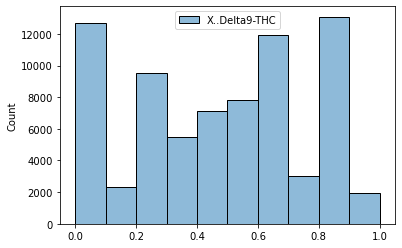

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.11118791539479182

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.032395634047639676

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17998787194597218

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7598524444967079

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.6074614321046738

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.28422344e-01, 1.20546745e-01, 1.27570121e-01, 1.19585587e-01,
       1.22864579e-01, 1.19079309e-02, 1.06717861e-02, 2.81661693e-02,
       1.17488400e-04, 2.08002884e-03, 8.58929425e-03, 1.13396641e-06,
       8.05559010e-03, 1.19500710e-04, 4.33326041e-03, 6.45904701e-03,
       8.85321114e-03, 7.96004228e-03, 3.26886967e-06, 1.00928847e-02,
       2.84064683e-06, 4.49175282e-06, 7.81938693e-03, 6.98205080e-03,
       9.84419535e-03, 2.62104119e-03, 9.01479909e-03, 1.08456495e-04,
       3.45088789e-06, 2.13202602e-03, 1.20117065e-02, 1.96593242e-06,
       1.17183364e-02, 0.00000000e+00, 2.21501065e-06, 5.69221758e-03,
       6.24248176e-03, 8.78325862e-03, 1.64408962e-03, 2.85153269e-04,
       5.75774665e-04, 5.51097210e-03, 2.26990936e-04, 4.71138899e-03,
       1.40758920e-03, 1.04488063e-02, 1.55229680e-03, 2.74448069e-04,
       6.35495654e-03, 1.14483952e-03, 2.80994814e-02, 1.25098113e-02,
       3.23996800e-03, 1.24753248e-03, 7.62028726e-03, 1.61446992e-03,
      

In [19]:
selector.threshold_

0.011627906976744184

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,relaxed,sleepy,diesel,earthy,lemon,orange,sweet
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,1,0,0,0,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,0,0,0,1
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,1,1,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'relaxed',
 'sleepy',
 'diesel',
 'earthy',
 'lemon',
 'orange',
 'sweet']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_thc.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_thc.pkl")

['selector_knn_lsa_elbow_thc.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.11553073410877557

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.03353293357288707

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1831199977416095

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7570816712354311

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.591722806286371

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 15}

kNN (after hyperparameter tuning)

In [38]:
knreg_ht = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [39]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.04674652019398956

In [40]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.12307348334039968

In [41]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9747522513313958

In [42]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8155780721785046

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [43]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [44]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_thc.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_thc.pkl")

['y_test_knreg_lsa_elbow_thc.pkl']

In [45]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.045063506670681826

In [46]:
mean_squared_error(y_test, y_pred_knreg_test)

0.014127410506228769

In [47]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.11885878388334944

In [48]:
r2_score(y_test, y_pred_knreg_test)

0.8283220112812657

In [49]:
y_test

,X..Delta9-THC
11591,0.807281
52020,0.012389
34666,0.246406
22169,0.030284
23049,1.000000
...,...
60863,0.831753
32316,0.566840
60933,0.831753
43206,0.602325


In [50]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

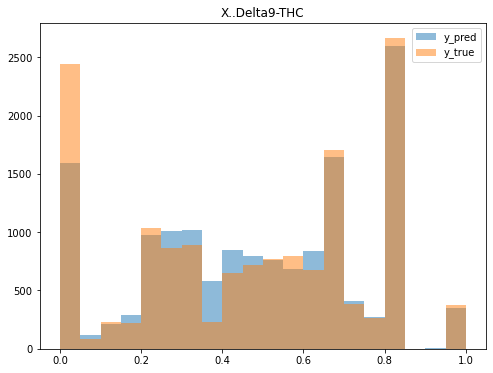

<Figure size 432x288 with 0 Axes>

In [51]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Delta9-THC"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_thc.png')

Pearson R

In [52]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.912
P-value: 0.000


<AxesSubplot:>

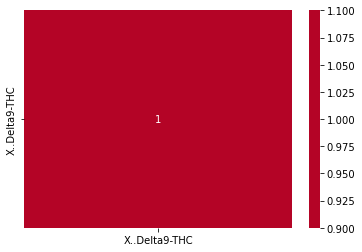

In [53]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)